In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [19]:
plt.rcParams['figure.figsize'] = (24,6)

In [20]:
df = pd.read_csv('results/openml_scores.csv')

In [21]:
df

,cycle,task,method,instances,features,classes,accuracy,f1,optimization_time,prediction_time,no_features,best_trial
0,0,3,baseline,3196,36,2,0.882169,0.881168,7.152557e-07,0.148497,36,0
1,0,3,intercorrelation_filter,3196,36,2,0.882169,0.881168,2.911139e-02,0.138206,36,0
2,0,3,correlation_weighting,3196,36,2,0.932221,0.932036,2.911139e-02,0.148061,36,0
3,0,3,tree_based_filter,3196,36,2,0.732013,0.723939,1.660547e-01,0.123681,18,0
4,0,3,tree_based_weighting,3196,36,2,0.728884,0.723729,1.660547e-01,0.143437,18,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6235,9,167141,forward_selection,5000,20,2,0.868667,0.589487,1.478143e+00,0.043735,1,0
6236,9,167141,backwards_selection,5000,20,2,0.865333,0.524407,5.271451e+00,0.211825,19,0
6237,9,167141,stepwise_selection,5000,20,2,0.873333,0.582415,3.625841e+00,0.154725,11,0
6238,9,167141,bayesselection,5000,20,2,0.899333,0.712680,5.020056e+01,0.080641,7,129


In [22]:
df[(df.method=='baseline') | (df.method=='bayesselection') | (df.method=='bayeswweighting')].accuracy.value_counts()

0.988142    10
0.953216     9
0.985437     8
0.927928     8
0.965854     7
            ..
0.874459     1
0.866242     1
0.554404     1
0.955179     1
0.777031     1
Name: accuracy, Length: 849, dtype: int64

In [23]:
df[df.method=='baseline'].groupby(['cycle','task','method']).mean()

instances  features  classes  accuracy        f1  \
cycle task   method                                                       
0     3      baseline       3196        36        2  0.882169  0.881168   
      11     baseline        625         4        3  0.904255  0.622578   
      14     baseline       2000        76       10  0.775000  0.764421   
      15     baseline        683         9        2  0.960976  0.955308   
      16     baseline       2000        64       10  0.903333  0.904819   
...                          ...       ...      ...       ...       ...   
9     146819 baseline        540        18        2  0.925926  0.552074   
      146820 baseline       4839         5        2  0.942837  0.508257   
      146821 baseline       1728         6        4  0.899807  0.718451   
      146822 baseline       2310        16        7  0.831169  0.823393   
      167141 baseline       5000        20        2  0.864667  0.520139   

                       optimization_time  prediction_time  no_features  \
cycle task   method                                                      
0     3      baseline       7.152557e-07         0.148497           36   
      11     baseline       4.768372e-07         0.013088            4   
      14     baseline       4.768372e-07         0.074896           76   
      15     baseline       7.152557e-07         0.013078            9   
      16     baseline       7.152557e-07         0.068417           64   
...                                  ...              ...          ...   
9     146819 baseline       4.768372e-07         0.014508           18   
      146820 baseline       4.768372e-07         0.067767            5   
      146821 baseline       4.768372e-07         0.026049            6   
      146822 baseline       7.152557e-07         0.100257           16   
      167141 baseline       9.536743e-07         0.188771           20   

                       best_trial  
cycle task   method                
0     3      baseline           0  
      11     baseline           0  
      14     baseline           0  
      15     baseline           0  
      16     baseline           0  
...                           ...  
9     146819 baseline           0  
      146820 baseline           0  
      146821 baseline           0  
      146822 baseline           0  
      167141 baseline           0  

[480 rows x 9 columns]

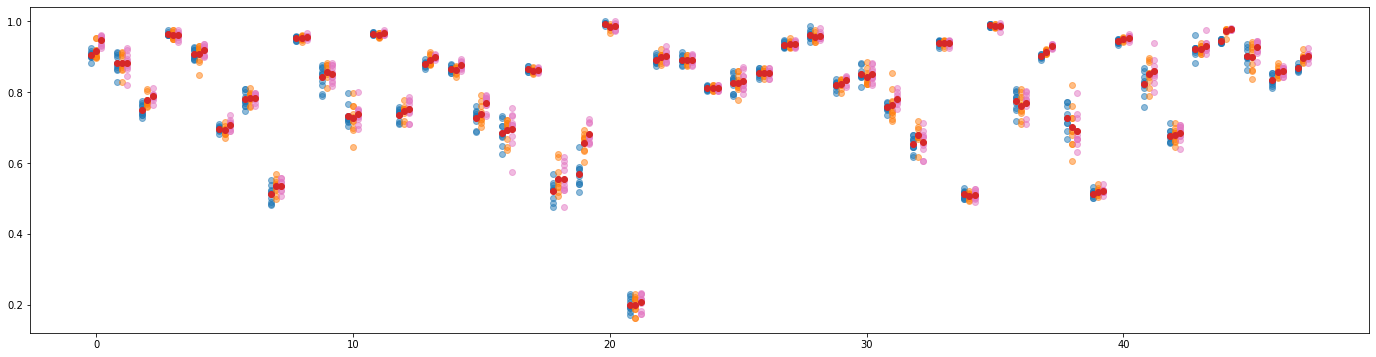

In [34]:
for i, task in enumerate(df.task.unique()):
    plt.scatter([i - 0.2 for _ in range(10)], df[(df.task == task) & (df.method=='baseline')].accuracy, c='C0', alpha=0.5)
    plt.scatter([i for _ in range(10)], df[(df.task == task) & (df.method=='bayesselection')].accuracy, c='C1', alpha=0.5)
    plt.scatter([i + 0.2 for _ in range(10)], df[(df.task == task) & (df.method=='bayeswweighting')].accuracy, c='C6', alpha=0.5)
    plt.scatter(i - 0.2, df[(df.task == task) & (df.method=='baseline')].accuracy.mean(), c='C3')
    plt.scatter(i, df[(df.task == task) & (df.method=='bayesselection')].accuracy.mean(), c='C3')
    plt.scatter(i + 0.2, df[(df.task == task) & (df.method=='bayeswweighting')].accuracy.mean(), c='C3')

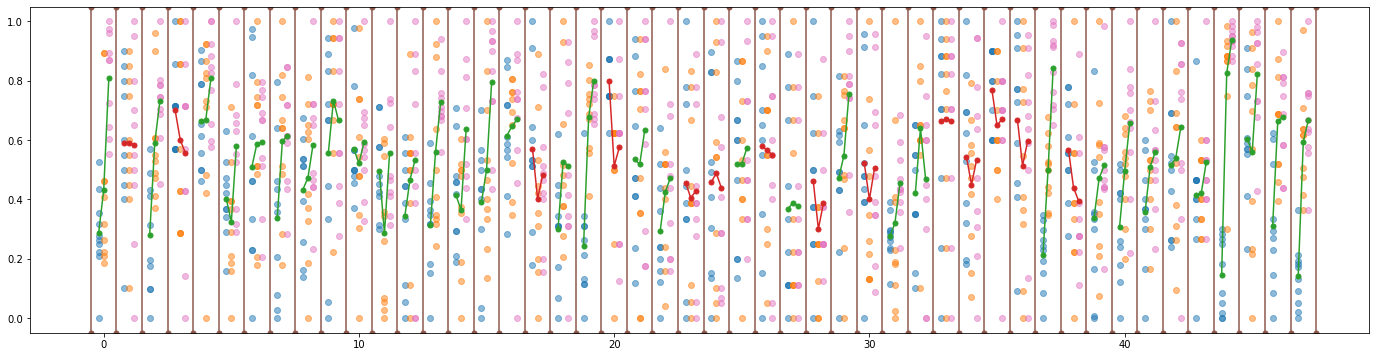

In [35]:
plt.axvline(-0.5, color='C5', marker = 'o', markersize=5)
for i, task in enumerate(df.task.unique()):
    a, b = df[(df.task == task) & (df.method=='baseline')].accuracy.mean(), df[(df.task == task) & (df.method=='bayeswweighting')].accuracy.mean()
    lower = df[(df.task == task) & ((df.method=='baseline') | (df.method=='bayesselection') | (df.method=='bayeswweighting'))].accuracy.min()
    higher = df[(df.task == task) & ((df.method=='baseline') | (df.method=='bayesselection') | (df.method=='bayeswweighting'))].accuracy.max()
    delta = higher - lower
    plt.scatter([i-0.2 for _ in range(10)], (df[(df.task == task) & (df.method=='baseline')].accuracy-lower)/delta, c='C0', alpha=0.5)
    plt.scatter([i for _ in range(10)], (df[(df.task == task) & (df.method=='bayesselection')].accuracy-lower)/delta, c='C1', alpha=0.5)
    plt.scatter([i+0.2 for _ in range(10)], (df[(df.task == task) & (df.method=='bayeswweighting')].accuracy-lower)/delta, c='C6', alpha=0.5)
    if b > a:
        plt.plot([i-0.2, i, i+0.2], [(df[(df.task == task) & (df.method=='baseline')].accuracy.mean()-lower)/delta, (df[(df.task == task) & (df.method=='bayesselection')].accuracy.mean()-lower)/delta, (df[(df.task == task) & (df.method=='bayeswweighting')].accuracy.mean()-lower)/delta], c='C2', marker = 'o', markersize=5)
    else:
        plt.plot([i-0.2, i, i+0.2], [(df[(df.task == task) & (df.method=='baseline')].accuracy.mean()-lower)/delta, (df[(df.task == task) & (df.method=='bayesselection')].accuracy.mean()-lower)/delta, (df[(df.task == task) & (df.method=='bayeswweighting')].accuracy.mean()-lower)/delta], c='C3', marker = 'o', markersize=5)
    plt.axvline(i+0.5, color='C5', marker = 'o', markersize=5)

In [26]:
for i, task in enumerate(df.task.unique()):
    a, b = df[(df.task == task) & (df.method=='baseline')].accuracy.mean(), df[(df.task == task) & (df.method=='bayeswweighting')].accuracy.mean()
    if a > b + 0.01:
        print(task, a, b, a > b)

14954 0.7285714285714286 0.6916666666666667 True


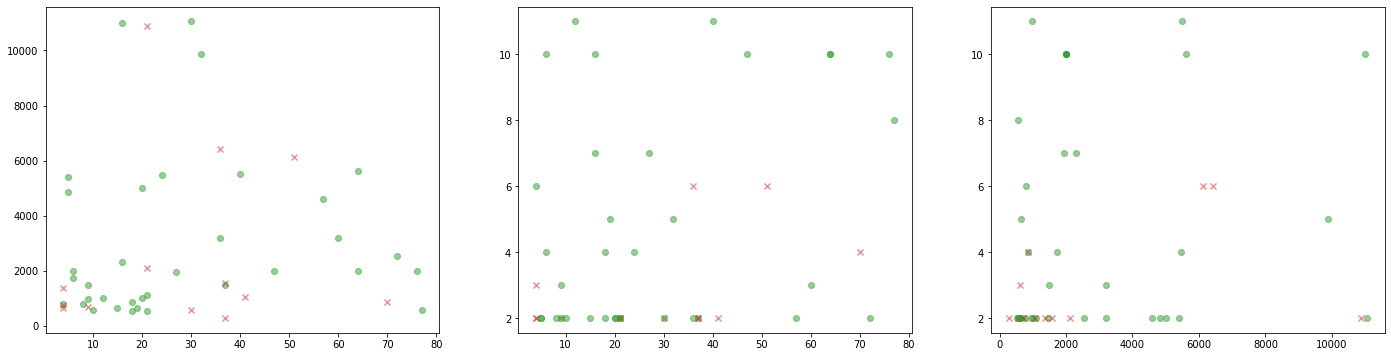

In [38]:
plt.subplot(1,3,1)
for i, task in enumerate(df.task.unique()):
    a, b = df[(df.task == task) & (df.method=='baseline')].accuracy.mean(), df[(df.task == task) & (df.method=='bayeswweighting')].accuracy.mean()
    nfeatures, ninstances, nclasses = df[(df.task == task)].iloc[0].features, df[(df.task == task)].iloc[0].instances, df[(df.task == task)].iloc[0].classes
    if a > b:
        plt.scatter(nfeatures, ninstances, color = 'C3', marker='x', alpha=0.5)
    else:
        plt.scatter(nfeatures, ninstances, color = 'C2', alpha=0.5)
plt.subplot(1,3,2)
for i, task in enumerate(df.task.unique()):
    a, b = df[(df.task == task) & (df.method=='baseline')].accuracy.mean(), df[(df.task == task) & (df.method=='bayeswweighting')].accuracy.mean()
    nfeatures, ninstances, nclasses = df[(df.task == task)].iloc[0].features, df[(df.task == task)].iloc[0].instances, df[(df.task == task)].iloc[0].classes
    if a > b:
        plt.scatter(nfeatures, nclasses, color = 'C3', marker='x', alpha=0.5)
    else:
        plt.scatter(nfeatures, nclasses, color = 'C2', alpha=0.5)
plt.subplot(1,3,3)
for i, task in enumerate(df.task.unique()):
    a, b = df[(df.task == task) & (df.method=='baseline')].accuracy.mean(), df[(df.task == task) & (df.method=='bayeswweighting')].accuracy.mean()
    nfeatures, ninstances, nclasses = df[(df.task == task)].iloc[0].features, df[(df.task == task)].iloc[0].instances, df[(df.task == task)].iloc[0].classes
    if a > b:
        plt.scatter(ninstances, nclasses, color = 'C3', marker='x', alpha=0.5)
    else:
        plt.scatter(ninstances, nclasses, color = 'C2', alpha=0.5)

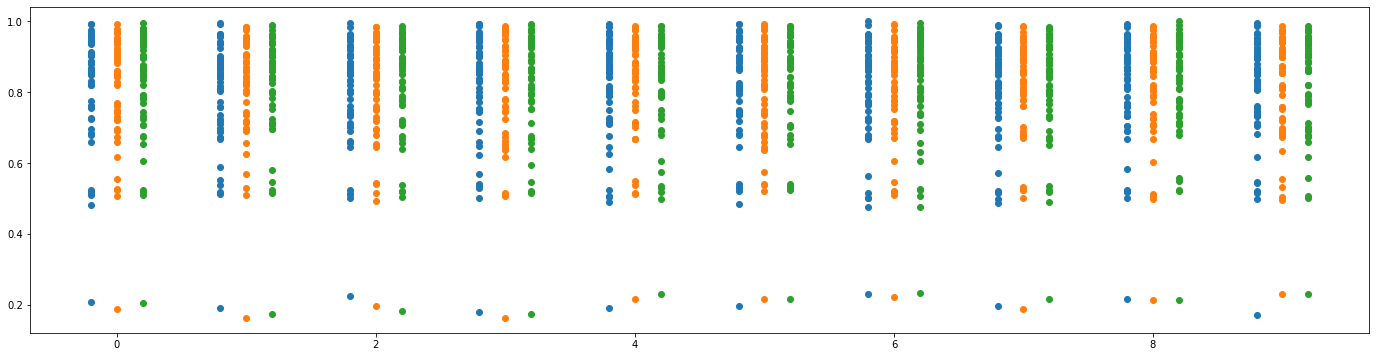

In [28]:
plt.scatter(df[df.method=='baseline'].cycle - 0.2, df[df.method=='baseline'].accuracy)
plt.scatter(df[df.method=='bayesselection'].cycle, df[df.method=='bayesselection'].accuracy)
plt.scatter(df[df.method=='bayeswweighting'].cycle + 0.2, df[df.method=='bayeswweighting'].accuracy)

In [29]:
import openml
benchmark_suite = openml.study.get_suite('OpenML-CC18')

for task_id in benchmark_suite.tasks:
    task = openml.tasks.get_task(task_id)
    print(task)

In [30]:
for method in df.method.unique():
    print(method.ljust(30), df[df.method==method].accuracy.mean(), df[df.method==method].f1.mean())

baseline                       0.8015032738688528 0.6935452346813265
intercorrelation_filter        0.7972488119532142 0.6901732643628858
correlation_weighting          0.7985612617955715 0.7024706277185249
tree_based_filter              0.7666809965327405 0.6543029208332053
tree_based_weighting           0.77528429359772 0.6698884484359937
l1filter                       0.8051448166844285 0.709896138674559
relieff                        0.7877484644620734 0.676214746473493
relieff_weighting              0.7286305187777612 0.6108830681269164
forward_selection              0.7919980725795607 0.6776526217288235
backwards_selection            0.8033786116533919 0.7042211612722984
stepwise_selection             0.7998828113103443 0.6978122937909125
bayesselection                 0.8081027741245786 0.7133351996805177
bayeswweighting                0.8143239884265944 0.7256670253419586


In [31]:
ndf = df[df.features < 20]
for method in ndf.method.unique():
    print(method.ljust(30), ndf[ndf.method==method].accuracy.mean(), ndf[ndf.method==method].f1.mean())

baseline                       0.7574293125563352 0.6625085994592453
intercorrelation_filter        0.7557364899450846 0.6591901253696375
correlation_weighting          0.7635470912870278 0.6818958572071453
tree_based_filter              0.716648743996914 0.6169077552867612
tree_based_weighting           0.7238449026250976 0.6287009451213892
l1filter                       0.7615622019812888 0.6824603571369801
relieff                        0.7397204229076428 0.637282911228883
relieff_weighting              0.7092996258223981 0.6041241078265154
forward_selection              0.7481177873028234 0.6352868353050246
backwards_selection            0.7604464397087553 0.686061846091406
stepwise_selection             0.76247647265641 0.6802155155696787
bayesselection                 0.7691659335956296 0.6950409216795446
bayeswweighting                0.775688767125224 0.71237983086375
